In [1]:
import numpy as np
import scipy
from scipy.linalg import expm
import random
import math
from scipy.stats import unitary_group
import matplotlib.pyplot as plt

In [2]:
def create_un_mat(v):
    Mc = np.zeros((4, 4),dtype=np.complex128)
    Mc[0][1] = v[0] + 1j * v[1]
    Mc[1][0] = v[0] - 1j * v[1]
    
    Mc[0][2] = v[2] + 1j * v[3]
    Mc[2][0] = v[2] - 1j * v[3]
    
    Mc[0][3] = v[4] + 1j * v[5]
    Mc[3][0] = v[4] - 1j * v[5]

    Mc[1][2] = v[6] + 1j * v[7]
    Mc[2][1] = v[6] - 1j * v[7]

    Mc[1][3] = v[8] + 1j * v[9]
    Mc[3][1] = v[8] - 1j * v[9]

    Mc[2][3] = v[10] + 1j * v[11]
    Mc[3][2] = v[10] - 1j * v[11]
    
    U = expm(1j * Mc)
    
    return U



def f(v, data):
    M1 = create_un_mat(v[:12])
    M2 = create_un_mat(v[12:24])
    alpha = np.reshape(v[24:33], (3, 3))
    h_0 = v[33:36]
    power = v[36]
    cost = 0
    for i in data:
        x = np.zeros(3)
        x[i[0]] = i[2] ** power
        y = i[3:]
        y /= np.sum(y)
        h_list = h_0 + alpha.dot(np.transpose(x))
        H = np.diag([math.e ** (1j * h) for h in h_list] + [1])
        predict = (np.abs(np.transpose(M2.dot(H).dot(M1)))** 2)[i[1]]
        cost += np.linalg.norm(np.array(predict)[0] - y)
    return cost



def numerical_gradient(data, x, epsilon=1e-8):
    grad = np.zeros_like(x)
    f_0 = f(x, data)
    for i in range(len(x)):
        x_up = np.copy(x)
        x_down = np.copy(x)
        x_up[i] += epsilon
        x_down[i] -= epsilon
        grad[i] = (f_0 - f(x_down, data)) / (2 * epsilon)
    return np.sign(grad)


def gradient_descent(data, x0, learning_rate_start=0.01, learning_rate_finish=0.01, max_iter=1000, tol=1e-4):
    x = np.array(x0, dtype=float)
    for i in range(max_iter):
        learning_rate = (1 - i / max_iter) * learning_rate_start + learning_rate_finish
        learning_rate = learning_rate_start
        grad = numerical_gradient(data, x)
        x_new = x - learning_rate * grad
        if i % 10 == 0:
            print(x_new)
            print("Iteration = ", i, "difference = ", np.linalg.norm(x_new - x))
            print(f(x, data))
        # if f(x_new, data) - f(x, data) < tol:
        #     print(f"Сходимость достигнута за {i+1} итераций.")
        #     break
        x = x_new
    return x, f(x, data)

In [4]:
data = []
for ch in range(4):
    for H in range(3):
        with open(f"ch{ch + 1}_H{H + 9}.txt") as file:
            for line in file:
                try:
                    row = [float(num) for num in line.split()]
                    row[0] *= 1000
                    data.append([H, ch] + row)
                except:
                    pass

# x0 = np.random.random(36) * 0.5 - 0.15
# minimum_x, minimum_f = gradient_descent(data, x0, learning_rate_start=0.0001, learning_rate_finish=0.002)
# print(f"Минимум функции: f({minimum_x}) = {minimum_f}")

In [13]:
minimum_x = [ 0.44048038, -0.032229,  0.22794207,  0.92367256,  0.48053374,  0.55673636,0.71601264,  0.10386402,  0.174528,  0.12377722,  0.7787562 ,  1.05476696,0.52449231, -0.05545031,  0.473631,  0.44988106,  0.5456617 ,  0.60637207,0.49736276, -0.39793316,  0.762737,  0.43025395,  1.15278595,  0.69420529,0.87808609,  0.92858932,  0.013971,  1.20005452, -0.64923076,  1.23973055,0.11342851, -0.02522541, -0.039022, -0.30794506,  0.46715615,  0.34710775,2.061264  ]
print(np.array(minimum_x)*2)

[ 0.88096076 -0.064458    0.45588414  1.84734512  0.96106748  1.11347272
  1.43202528  0.20772804  0.349056    0.24755444  1.5575124   2.10953392
  1.04898462 -0.11090062  0.947262    0.89976212  1.0913234   1.21274414
  0.99472552 -0.79586632  1.525474    0.8605079   2.3055719   1.38841058
  1.75617218  1.85717864  0.027942    2.40010904 -1.29846152  2.4794611
  0.22685702 -0.05045082 -0.078044   -0.61589012  0.9343123   0.6942155
  4.122528  ]


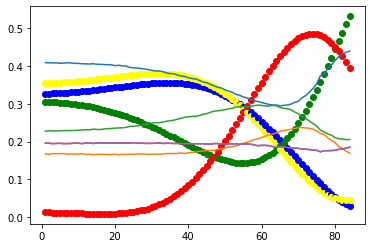

In [15]:
minimum_x = [-9.01956034e-01,  8.74385026e-01,  1.09828027e+00,  8.82065368e-01,
 -2.31327601e-01, -5.02960660e-01,  9.95458957e-01, -8.88173752e-01,
  2.81315100e-01,  1.01313985e+00, -1.38759816e-01,  1.04227919e+00,
  3.30879006e-01,  2.98846762e-01,  1.33234783e-01, -2.66454363e-02,
  1.21061661e+00,  5.08040156e-01,  3.66054184e-01,  1.08378887e+00,
  1.15004830e+00, -2.23319681e-01, -2.77453343e-01,  1.88927690e+00,
  6.87866000e-04,  6.66990000e-04,  6.25390000e-04,  5.16506000e-04,
  5.37474000e-04,  5.37474000e-04,  5.37566000e-04,  5.37574000e-04,
  5.79426000e-04,  7.84900000e-01, -5.10260000e-01, -3.01140000e-01,
  2.56700000e+00]
M1 = create_un_mat(minimum_x[:12])
M2 = create_un_mat(minimum_x[12:24])
alpha = np.reshape(np.array(minimum_x[24:33]), (3, 3))
h_0 = minimum_x[33:36]
power = minimum_x[36]

# print(M1, M2, alpha, h_0)

for i in data[0:84]:
    x = np.zeros(3)
    x[i[0]] = i[2] ** 2
    h_list = h_0 + alpha.dot(np.transpose(x))
    H = np.diag([math.e ** (1j * h) for h in h_list] + [1])
    result = (np.abs(np.transpose(M2.dot(H).dot(M1))) ** 2)[i[1]]
    plt.scatter(i[2], result[0], color = 'blue')
    plt.scatter(i[2], result[1], color = 'green')
    plt.scatter(i[2], result[2], color = 'yellow')
    plt.scatter(i[2], result[3], color = 'red')

# # plt.scatter(1000*i[2], result[0]+predict[1]+predict[2]+predict[3], color = 'black')

plt.plot([d[2] for d in data[0:84]], [d[3]/sum(d[3:]) for d in data[0:84]])#, color = 'blue')
plt.plot([d[2] for d in data[0:84]], [d[4]/sum(d[3:]) for d in data[0:84]])#, color = 'green')
plt.plot([d[2] for d in data[0:84]], [d[5]/sum(d[3:]) for d in data[0:84]])#, color = 'yellow')
plt.plot([d[2] for d in data[0:84]], [d[6]/sum(d[3:]) for d in data[0:84]])#, color = 'red')
plt.plot([d[2] for d in data[0:84]], [d[6]/sum(d[3:]) for d in data[0:84]])




In [ ]:
np.random.seed(0)
minimum_x0 = np.random.random(36)


M1 = create_un_mat(minimum_x0[:12])
M2 = create_un_mat(minimum_x0[12:24])
alpha = np.reshape(minimum_x0[24:33], (3, 3))
h_0 = minimum_x0[33:36]
cost = 0
for i in data[0:84]:
    x = np.zeros(3)
    x[i[0]] = 10000 * i[2] ** 2
    h_list = h_0 + alpha.dot(np.transpose(x))
    H = np.diag([math.e ** (1j * h) for h in h_list] + [1])
    predict = (np.abs(np.transpose(M2.dot(H).dot(M1))) ** 2)[i[1]]
    
    plt.scatter(1000*i[2], predict[0], color = 'blue')
    plt.scatter(1000*i[2], predict[1], color = 'green')
    plt.scatter(1000*i[2], predict[2], color = 'yellow')
    plt.scatter(1000*i[2], predict[3], color = 'red')
    plt.scatter(1000*i[2], predict[0]+predict[1]+predict[2]+predict[3], color = 'black')

In [ ]:
def create_param_mat(v):
    # Mc = np.zeros((4, 4))
    bs_12 = 1/np.sqrt(2)*np.array([[1,1*1j,0,0],[1*1j,1,0,0],[0,0,1,0],[0,0,0,1]])
    bs_23 = 1/np.sqrt(2)*np.array([[1,0,0,0],[0,1,1*1j,0],[0,1*1j,1,0],[0,0,0,1]])
    bs_34 = 1/np.sqrt(2)*np.array([[1,0,0,0],[0,1,0,0],[0,0,1,1*1j],[0,0,1*1j,1]])
    ph_1 = np.array([[1,0,0,0], [0,1,0,0], [0,0,np.exp(1j*v[0]),0], [0,0,0,1]])
    ph_2 = np.array([[1,0,0,0], [0,1,0,0], [0,0,np.exp(1j*v[1]),0], [0,0,0,1]])
    ph_3 = np.array([[1,0,0,0], [0,1,0,0], [0,0,np.exp(1j*v[2]),0], [0,0,0,1]])
    ph_4 = np.array([[1,0,0,0], [0,1,0,0], [0,0,np.exp(1j*v[3]),0], [0,0,0,1]])
    ph_5 = np.array([[1,0,0,0], [0,1,0,0], [0,0,np.exp(1j*v[4]),0], [0,0,0,1]])
    ph_6 = np.array([[1,0,0,0], [0,np.exp(1j*v[5]),0,0], [0,0,1,0], [0,0,0,1]])
    ph_7 = np.array([[1,0,0,0], [0,np.exp(1j*v[6]),0,0], [0,0,1,0], [0,0,0,1]])
    ph_8 = np.array([[1,0,0,0], [0,np.exp(1j*v[7]),0,0], [0,0,1,0], [0,0,0,1]])
    ph_9 = np.array([[np.exp(1j*v[8]),0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]])

    return bs_34.dot(ph_5).dot(bs_34).dot(bs_23).dot(ph_8).dot(bs_23).dot(ph_4).dot(bs_12).dot(bs_34).dot(ph_9).dot(ph_3).dot(bs_12).dot(bs_34).dot(ph_7).dot(bs_23).dot(ph_6).dot(bs_23).dot(ph_2).dot(bs_34).dot(ph_1).dot(bs_34)

In [ ]:
import cmath as cm

def T_pq(N, p, q, phi, theta):
    res = np.eye(N, dtype=np.complex128)
    res[p-1][q-1] = np.exp(1j * phi) * np.sin(theta)
    res[p][q-1] = np.exp(1j * phi) * np.cos(theta)
    res[p-1][q] = np.cos(theta)
    res[p][q] = - np.sin(theta)

    return res

def Reck_extend(N, phases, phases_last):
    k=0
    U=np.eye(N, dtype=np.complex128)
    for p in range(1,N):
        for q in range(1,p):
            U=U.dot(T_pq(N,p,q,phases[k][0], phases[k][1]))
            k+=1
        D=np.eye(N,dtype=np.complex128)
        for i in range(N-1):
            D[i,i]=cm.exp(1j*phases_last[i])
        U=U.dot(D)
    return np.linalg.inv(U)

def create_Reck_mat(v):
    return Reck_extend(4, np.array(v[:6]).reshape(3,2), v[6:9])

In [ ]:
minimum_x

In [ ]:
minimum_x0 = np.random.random(6)

def bs_matrix():
    return 1/np.sqrt(2)*np.array([[1,1j],[1j,1]], dtype=np.complex128)

M1 = bs_matrix()
M2 = bs_matrix()

alpha = np.reshape(minimum_x0[:4], (2, 2))

phi_sweep = np.linspace(0, 2*np.pi, 100)

h_0 = minimum_x0[4:5]
for i in phi_sweep:
    x = np.zeros(2)
    # x[0] = 10000 * i[2] ** 2

    # h_list = np.array(h_0 + np.asmatrix(alpha) * np.asmatrix(x).T)[0]
    H = np.diag([np.exp(1j * i)] + [1])

    predict = (abs(np.transpose((M2.dot(H).dot(M1)))**2))[0]
    # print(predict)
    plt.scatter(i, predict[0], color = 'blue')
    plt.scatter(i, predict[1], color = 'green')
    # plt.scatter(1000*i[2], predict[1], color = 'green')
    # plt.scatter(1000*i[2], predict[2], color = 'yellow')
    # plt.scatter(1000*i[2], predict[3], color = 'red')